In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target)=\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) /255.0
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42)   

In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation='relu',
                             padding='same', input_shape=(28,28,1)))

In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation='relu',
                             padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

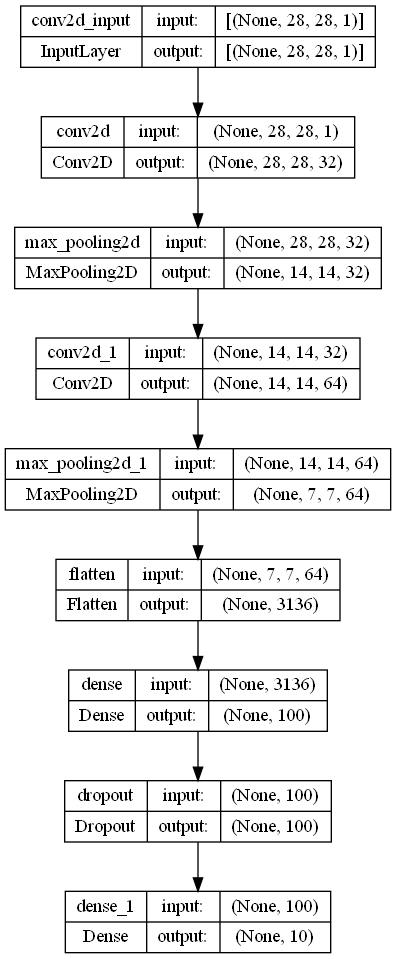

In [8]:
keras.utils.plot_model(model, show_shapes=True)

In [15]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', 
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2,
                                                restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs = 20,
                   validation_data = (val_scaled, val_target), 
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 32s 20ms/step - loss: 0.5154 - accuracy: 0.8150 - val_loss: 0.3345 - val_accuracy: 0.8809
Epoch 2/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.3389 - accuracy: 0.8790 - val_loss: 0.2768 - val_accuracy: 0.8982
Epoch 3/20
1500/1500 [==============================] - 32s 21ms/step - loss: 0.2937 - accuracy: 0.8947 - val_loss: 0.2484 - val_accuracy: 0.9093
Epoch 4/20
1500/1500 [==============================] - 32s 21ms/step - loss: 0.2585 - accuracy: 0.9061 - val_loss: 0.2380 - val_accuracy: 0.9123
Epoch 5/20
1500/1500 [==============================] - 32s 22ms/step - loss: 0.2354 - accuracy: 0.9153 - val_loss: 0.2311 - val_accuracy: 0.9153
Epoch 6/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2137 - accuracy: 0.9204 - val_loss: 0.2188 - val_accuracy: 0.9209
Epoch 7/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.1978 - accuracy: 0.9276 - val_loss: 0.2284 -

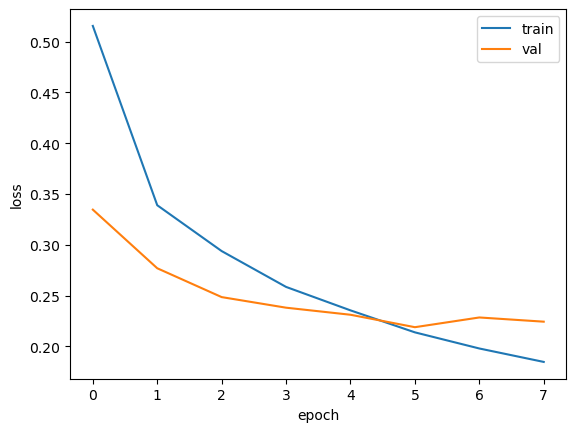

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [21]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 7ms/step - loss: 0.2188 - accuracy: 0.9209


[0.2188025861978531, 0.9209166765213013]

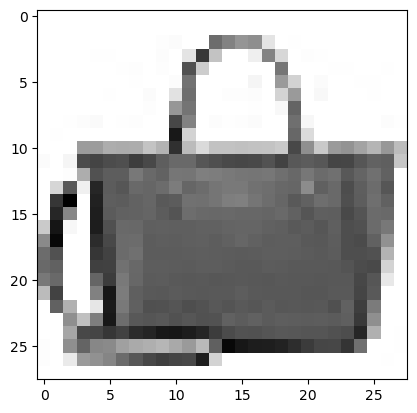

In [23]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [24]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 115ms/step
[[1.1306435e-16 3.9567700e-21 4.3706076e-17 9.0953995e-20 4.5099502e-16
  7.3672115e-16 6.4402224e-17 1.9055080e-15 1.0000000e+00 6.1529029e-17]]


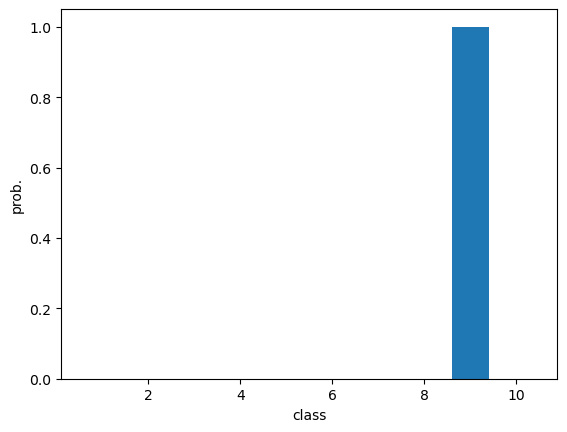

In [25]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [28]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [30]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [31]:
test_scaled = test_input.reshape(-1,28,28,1)/255.0

In [32]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 6ms/step - loss: 0.2381 - accuracy: 0.9163


[0.23813696205615997, 0.9162999987602234]